# Deep Learning GPU Server Setup

## Increase your Google Cloud quota

1. Navigate to the IAM & Admin page at [console.cloud.google.com](https://console.cloud.google.com).
2. Navigate to "Quotas" in the sidebar.
2. Select the location for which you are requesting the quota increase.
3. Edit the quota for NVIDIA K80 GPUs.
4. Update the quota from 0 to 1 (you can give the reason "Deep Learning") and submit the request.

## Create a GPU Instance on Google Cloud

1. Create an instance in the `us-east1-c` zone.
2. Choose 1 K80 GPU.
3. 4 vCPUs and 16GBs memory is a reasonable amount.
4. Make sure you allocate at least 30GB of hard drive space (Tensorflow takes up a lot of space!).
5. Choose Ubuntu 16.04 LTS for the boot disk.

<div style="display:block;margin:auto;width:800px;">
    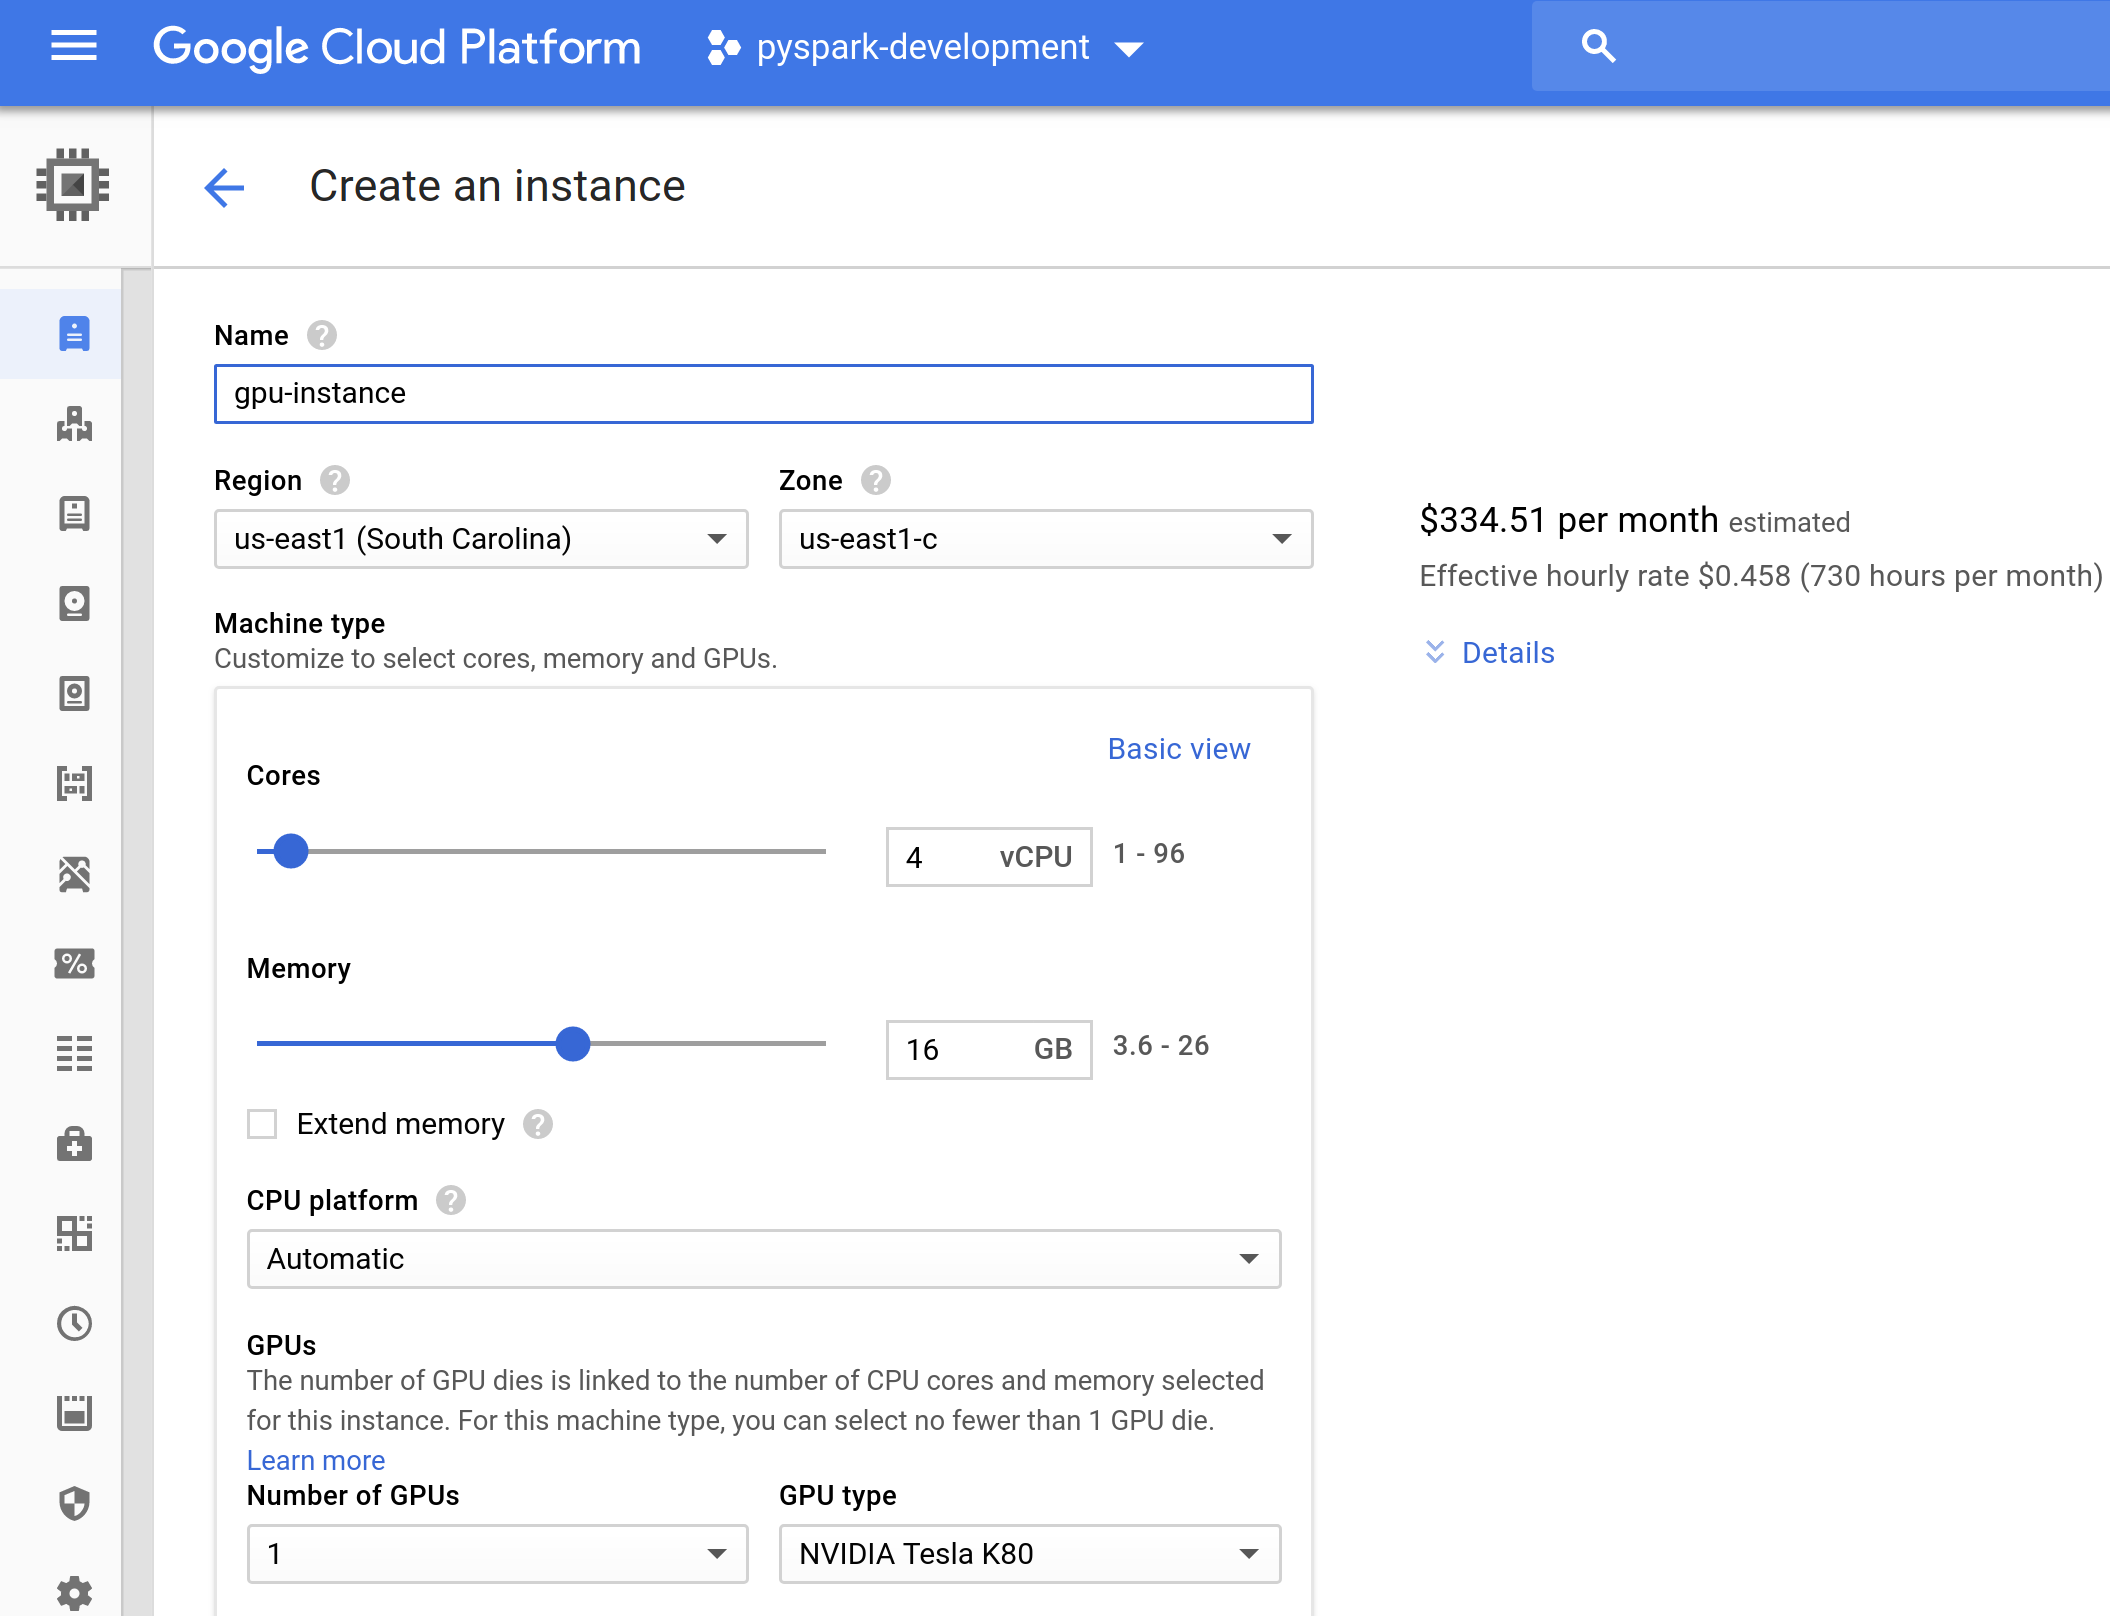
</div>
<div style="text-align:center;">**Create a GPU Instance**</div>

## Connect to the server
Use `gcloud` command line tools. If you've deployed the server in a different zone to your project default, make sure to reflect this in the `zone` flag for your `gcloud` call:
```
gcloud compute ssh gpu-instance --zone us-east1-c
```

Add your laptop's public key to `~/.ssh/authorized_keys` on the server. You should then be able to connect to the server using your username and the external IP address and `ssh` command. For example, I can now connect via:
```
ssh twolffpiggott_gmail_com@35.231.207.191 -A
```


## Clone the `server-setup` repository
If you don't already have `git` installed, install it via:
```
sudo apt-get update
sudo apt-get install git
```
Clone the repo using:
```
git clone git@github.com:twolffpiggott/server-setup
```
If you get a permissions error, you know the drill: generate a new keypair on the server and add the public key under the SSH Keys section of your Github account settings.

## Set up Pyenv
```
source ~/server-setup/pyenv_install.sh
source ~/server-setup/pyenv_set_version.sh
```
Both `python` and `pip` will now refer to Python `3.6.6`, which is the most current version of Python supported by Keras.

## Set up a virtual environment
```
source ~/server-setup/venv_setup.sh
```
The command `venv` now activates your virtual environment. **Be sure to activate it before installing any Python packages**.

## Install CUDA
CUDA is a parallel computing platform and programming model that makes using a GPU for general purpose computing simple and elegant.
```
source ~/server-setup/cuda_install.sh
```
Answer yes (`y`) to all the prompts during the install.

To verify the installation type the command `nvidia-smi`. You should see output along the lines of:
```
Wed Jul 11 20:59:34 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.37                 Driver Version: 396.37                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           On   | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU       PID   Type   Process name                             Usage      |
|=============================================================================|
|  No running processes found                                                 |
+-----------------------------------------------------------------------------+
```

## Install CUDNN
The NVIDIA CUDA Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, pooling, normalization, and activation layers. cuDNN is part of the NVIDIA Deep Learning SDK.

Sign up for the Nvidia developers program at https://developer.nvidia.com/developer-program

Install CUDNN 7.0.5 for CUDA 9.0 (Ubuntu 16.04 LTS) https://developer.nvidia.com/rdp/cudnn-archive

The downloaded file should be called `libcudnn7_7.0.5.15-1+cuda9.0_amd64.deb`.

Copy across the downloaded CUDNN file to the GPU server. Exit the server and your command should look something like this (of course adapted for your own user and filesystem):
```
scp libcudnn7_7.0.5.15-1+cuda9.0_amd64.deb twolffpiggott_gmail_com@35.231.207.191:/home/twolffpiggott_gmail_com/
```
Progress logs should print as the file copies across:
```
libcudnn7_7.0.5.15-1+cuda9.0_amd64.deb                             100%   98MB 572.1KB/s   02:55 
```
Reconnect to the server and install CUDNN from the copied file:
```
source server-setup/cudnn_install.sh
```

## Set `PATH` variables for CUDA
```
source server-setup/set_path_vars.sh
```

## Install Tensorflow and Keras
Activate your virtual environment with the command `venv`. Then install Tensorflow and Keras from the `tf_requirements.txt` file. 
```
pip install -r server-setup/tf_requirements.txt
```

## Clone the `ix-data-science` repo
```
git clone git@github.com:twolffpiggott/ix-data-science
```
Install the repo requirements from `requirements.txt`.
```
venv
pip install -r ~/ix-data-science/requirements.txt
```

## Host a `jupyter` notebook on the server

Connect with forwarding for port `9000` (this way it likely won't collide with any local notebooks).
```
ssh -L 9000:localhost:9000 twolffpiggott_gmail_com@35.231.207.191
```

Spin up a jupyter notebook on port `9000` of the GPU server.
```
cd ix-data-science
jupyter notebook --port 9000
```